In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('mixdata3_filtered.csv', sep = ',', encoding = 'utf-8-sig')

In [3]:
print(df.dtypes)

comment_text      object
toxic              int64
sever_toxic      float64
obscene          float64
threat           float64
insult           float64
identity_hate    float64
dtype: object


In [4]:
print(df.shape)

(326, 7)


In [5]:
comment = df['comment_text']
print(comment.head())
print(type(comment))

0    অভিনন্দন টিম টাইগারদের।  বিশ্বকাপ থেকে বিশাল এ...
1    ভচ মারশাফির স্থলাভিষিক্ত হয়েছে ভচ(জাতীয় ভাতিজা...
2    এখন তামিম ইকবাল সংবাদ সম্মেলনে বলবে : অামরা ৩০...
3    ভচ পীরবাবা মাছরাফির জায়গায় আরেক দানব বীর মুক্ত...
4    জার্সির কালারের সাথে পারফরম্যান্স একেবারে নিখু...
Name: comment_text, dtype: object
<class 'pandas.core.series.Series'>


In [6]:
comment = comment.as_matrix()
print(type(comment))

<class 'numpy.ndarray'>


C:\Users\AnubisJB\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [7]:
label = df[['toxic', 'sever_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]
pd.options.display.float_format = '{:,.0f}'.format
label.head()

,toxic,sever_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,1,0,0,0,0,0
2,0,0,0,0,0,0
3,1,0,0,0,1,0
4,0,0,0,0,0,0


In [8]:
label = label.as_matrix()

C:\Users\AnubisJB\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [9]:
ct1, ct2 = 0,0
for i in range(label.shape[0]):
    ct = np.count_nonzero(label[i])
    if ct:
        ct1 = ct1 + 1
    if ct>1:
        ct2 = ct2 + 1
print(ct1)
print(ct2)

180
34


Average length of comment: 56.699


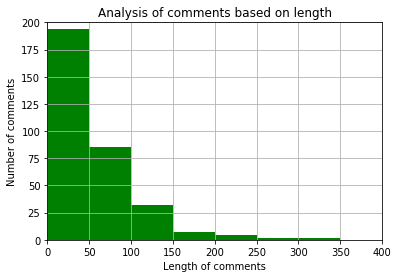

In [10]:
x = [len(comment[i]) for i in range(comment.shape[0])]
print('Average length of comment: {:.3f}'.format(np.mean(x)))
bins = [1, 50, 100, 150, 200, 250, 300, 350, 400]
plt.hist(x, bins = bins, color = 'g')
plt.xlabel('Length of comments')
plt.ylabel('Number of comments')
plt.title('Analysis of comments based on length')
plt.axis([0, 400, 0, 200])
plt.grid(True)
plt.show()

(326, 6)
<class 'numpy.ndarray'>
[[  0.   0.   0.   0.   0.   0.]
 [176.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 ...
 [ 16.   0.   0.   0.  16.   0.]
 [ 71.   0.   0.   0.   0.   0.]
 [ 92.   0.   0.   0.   0.   0.]]


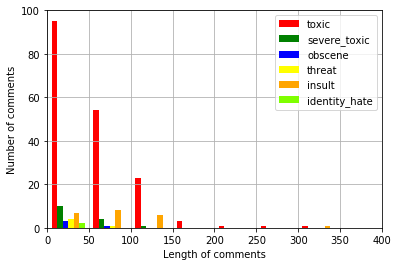

326
326


In [11]:
y = np.zeros(label.shape)
print(y.shape)
print(type(y))
for i in range(comment.shape[0]):
    l = len(comment[i])
    if label[i][0]:
        y[i][0] = l
    if label[i][1]:
        y[i][1] = l
    if label[i][2]:
        y[i][2] = l
    if label[i][3]:
        y[i][3] = l
    if label[i][4]:
        y[i][4] = l
    if label[i][5]:
        y[i][5] = l
print(y)
labelsplt = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
color = ['red', 'green', 'blue', 'yellow', 'orange', 'chartreuse']
plt.hist(y, bins = bins, label = labelsplt, color = color)
plt.axis([0, 400, 0, 100])
plt.xlabel('Length of comments')
plt.ylabel('Number of comments')
plt.legend()
plt.grid(True)
plt.show()
print(len(comment))
print(len(label))

In [12]:
comments = []
labels = []
for i in range(comment.shape[0]):
    if len(comment[i]) <= 400:
        comments.append(comment[i])
        labels.append(label[i])
labels = np.asarray(labels)
print(type(comments))

<class 'list'>


# Punctuation to White Space

In [13]:
import string
punctuation_edit = string.punctuation.replace('\'','') + '0123456789'
print(punctuation_edit)
outtab = "                                         "
trantab = str.maketrans(punctuation_edit, outtab)

!"#$%&()*+,-./:;<=>?@[\]^_`{|}~0123456789


# Bangla stopwords

In [14]:
import requests
url = 'https://github.com/stopwords-iso/stopwords-bn/blob/master/stopwords-bn.txt'
read_data = requests.get(url).content
type(read_data)

bytes

In [15]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AnubisJB\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [17]:
sw = pd.read_csv('all_bangla_stop_words.csv', sep = '\t', encoding = 'utf-8-sig').dropna()
sw.head()
sw = sw['words']
sw.shape

(996,)

In [18]:
stop_words = []
for i in range(sw.shape[0]):
    stop_words.append(sw[i])
print(type(stop_words))
print(len(stop_words))
print(stop_words)

<class 'list'>
996
['অবশ্য', 'অনেক', 'অনেকে', 'অনেকেই', 'অন্তত', 'অথবা', 'অথচ', 'অর্থাত', 'অন্য', 'আজ', 'আছে', 'আপনার', 'আপনি', 'আবার', 'আমরা', 'আমাকে', 'আমাদের', 'আমার', 'আমি', 'আরও', 'আর', 'আগে', 'আগেই', 'আই', 'অতএব', 'আগামী', 'অবধি', 'অনুযায়ী', 'আদ্যভাগে', 'এই', 'একই', 'একে', 'একটি', 'এখন', 'এখনও', 'এখানে', 'এখানেই', 'এটি', 'এটা', 'এটাই', 'এতটাই', 'এবং', 'একবার', 'এবার', 'এদের', 'এঁদের', 'এমন', 'এমনকী', 'এল', 'এর', 'এরা', 'এঁরা', 'এস', 'এত', 'এতে', 'এসে', 'একে', 'এ', 'ঐ', 'ই', 'ইহা', 'ইত্যাদি', 'উনি', 'উপর', 'উপরে', 'উচিত', 'ও', 'ওই', 'ওর', 'ওরা', 'ওঁর', 'ওঁরা', 'ওকে', 'ওদের', 'ওঁদের', 'ওখানে', 'কত', 'কবে', 'করতে', 'কয়েক', 'কয়েকটি', 'করবে', 'করলেন', 'করার', 'কারও', 'করা', 'করি', 'করিয়ে', 'করার', 'করাই', 'করলে', 'করলেন', 'করিতে', 'করিয়া', 'করেছিলেন', 'করছে', 'করছেন', 'করেছেন', 'করেছে', 'করেন', 'করবেন', 'করায়', 'করে', 'করেই', 'কাছ', 'কাছে', 'কাজে', 'কারণ', 'কিছু', 'কিছুই', 'কিন্তু', 'কিংবা', 'কি', 'কী', 'কেউ', 'কেউই', 'কাউকে', 'কেন', 'কে', 'কোনও', 'কোনো', 'কোন', 'কখনও', 'ক্ষেত্র

# Stemming and Lemmatization

# Punctuation Removal

In [69]:
for i in range(len(comments)):
    comments[i] = comments[i].translate(trantab)
print(type(comment))

<class 'numpy.ndarray'>


# Count Vectorizer

In [71]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer(stop_words = stop_words)
tf = count_vector.fit_transform(comments).toarray()
print(type(tf))
print(tf.shape)
print(labels.shape)

<class 'numpy.ndarray'>
(326, 515)
(326, 6)


# Split Dataset

In [72]:
def splitdataset(matrix, target, test_proportion):
    ratio = int(matrix.shape[0]/test_proportion)
    X_train = matrix[ratio:, :]
    X_test = matrix[:ratio, :]
    y_train = target[ratio:, :]
    y_test = target[:ratio, :]
    return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = splitdataset(tf, labels, 5)

print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(65, 515)
(261, 515)
(65, 6)
(261, 6)


# Implementaion

In [73]:
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

def evaluate_score(y_test, predict):
    hloss = hamming_loss(y_test, predict)
    print('Hamming_loss: {}'.format(hloss * 100))
    accuracy = accuracy_score(y_test, predict)
    print('Accuracy: {}'.format(accuracy * 100))
    try:
        lloss = log_loss(y_test, predict)
    except:
        lloss = log_loss(y_test, predict.toarray())
    print('Log_loss: {}'.format(lloss))
    

# 1. Binary Relevance (BR) Method with MultinomialNB classifiers (from scratch)

In [74]:
from sklearn.naive_bayes import MultinomialNB

In [75]:
print(y_train.shape)
clf = []
for i in range(6):
    clf.append(MultinomialNB())
    clf[i].fit(X_train, y_train[:,i])
    print("A")
    print(clf[i])
    #print(y_train[:,i])

(261, 6)
A
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
A
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
A
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
A
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
A
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
A
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


In [76]:
predict = []
for i in range(6):
    predict.append(clf[i].predict(X_test))

predict = np.asarray(np.transpose(predict))

print(predict.shape)
print(y_test.shape)


(65, 6)
(65, 6)


In [77]:
evaluate_score(y_test, predict)

Hamming_loss: 11.025641025641026
Accuracy: 52.307692307692314
Log_loss: 1.978830780196751


# 2. BR Method with SVM classifier (from scikit-multilearn)

In [78]:
!pip install scikit-multilearn

In [79]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.svm import SVC
classifier = BinaryRelevance(classifier = SVC(), require_dense = [False, True])
classifier.fit(X_train, y_train)

C:\Users\AnubisJB\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


BinaryRelevance(classifier=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
        require_dense=[False, True])

In [80]:
predictions = classifier.predict(X_test)

In [81]:
evaluate_score(y_test, predictions)



Hamming_loss: 11.538461538461538
Accuracy: 30.76923076923077
Log_loss: 3.188194744145605


# 3. BR Method with Multinomial classifier (from scikit-multilearn)

In [82]:
classifier = BinaryRelevance(classifier = MultinomialNB(), require_dense = [False, True])
classifier.fit(X_train,y_train)

BinaryRelevance(classifier=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
        require_dense=[False, True])

In [83]:
predictions = classifier.predict(X_test)

In [84]:
 evaluate_score(y_test, predictions)

Hamming_loss: 11.025641025641026
Accuracy: 52.307692307692314
Log_loss: 1.978830780196751


# 4. BR Method with GausseanNB classifier (from scratch)

In [85]:
from sklearn.naive_bayes import GaussianNB
clf = []
for i in range(6):
    clf.append(GaussianNB())
    clf[i].fit(X_train, y_train[:, i])

In [86]:
predict = []
for i in range(6):
    predict.append(clf[i].predict(X_test))

In [87]:
predict = np.asarray(np.transpose(predict))
print(predict)

[[0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0.

In [88]:
evaluate_score(y_test, predict)



Hamming_loss: 15.64102564102564
Accuracy: 49.23076923076923
Log_loss: 3.526839963445644


# 5. Classifier chain with MultinomialNB classifier (from scikit-multilearn)

In [89]:
from skmultilearn.problem_transform import ClassifierChain
classifier = ClassifierChain(MultinomialNB())
classifier.fit(X_train, y_train)

ClassifierChain(classifier=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
        order=None, require_dense=[True, True])

In [90]:
predictions = classifier.predict(X_test)

In [91]:
evaluate_score(y_test, predictions)



Hamming_loss: 11.538461538461538
Accuracy: 52.307692307692314
Log_loss: 1.974404902159031


# 6. Label Powerset with MultinomialNB classifier (from scikit-multilearn)

In [92]:
from skmultilearn.problem_transform import LabelPowerset
classifier = LabelPowerset(MultinomialNB())
classifier.fit(X_train, y_train)

LabelPowerset(classifier=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       require_dense=[True, True])

In [93]:
prediction = classifier.predict(X_test)

In [94]:
evaluate_score(y_test, prediction)



Hamming_loss: 7.948717948717948
Accuracy: 58.46153846153847
Log_loss: 1.404181747709509


# 7. MLkNN with k=2 (from scikit-multilearn)

In [95]:
from skmultilearn.adapt import MLkNN
classifier = MLkNN(k = 2)
classifier.fit(X_train, y_train)

MLkNN(ignore_first_neighbours=0, k=2, s=1.0)

In [96]:
prediction = classifier.predict(X_test)

In [97]:
evaluate_score(y_test, prediction)



Hamming_loss: 8.717948717948717
Accuracy: 58.46153846153847
Log_loss: 1.3490506871178767


# 8. BP-MLL Neural Networks (from scratch)

In [98]:
!pip install keras

In [105]:
!pip install tensorflow==2.0.0-beta1 

  Using cached https://files.pythonhosted.org/packages/24/2c/373d2847538fdd65742ad19df23946e0d0a8f1df7f5f0c6bce6e9b293088/tensorflow-2.0.0b1-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/a4/96/571b875cd81dda9d5dfa1422a4f9d749e67c0a8d4f4f0b33a4e5f5f35e27/tb_nightly-1.14.0a20190603-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/32/dd/99c47dd007dcf10d63fd895611b063732646f23059c618a373e85019eb0e/tf_estimator_nightly-1.14.0.dev2019060501-py2.py3-none-any.whl
  Found existing installation: tensorflow 1.14.0
    Uninstalling tensorflow-1.14.0:
      Successfully uninstalled tensorflow-1.14.0


Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\users\\anubisjb\\anaconda3\\lib\\site-packages\\~ensorflow\\python\\_pywrap_tensorflow_internal.pyd'
Consider using the `--user` option or check the permissions.



In [106]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [111]:
model = Sequential()
model.add(Dense(4, activation = 'relu', input_dim = X_train.shape[1]))
model.ad d(Dropout(0.3))
model.add(Dense(6, activation = 'softmax'))
model.summary()

W0807 22:45:27.245850  5800 deprecation_wrapper.py:119] From C:\Users\AnubisJB\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0807 22:45:27.249839  5800 deprecation_wrapper.py:119] From C:\Users\AnubisJB\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0807 22:45:27.261807  5800 deprecation_wrapper.py:119] From C:\Users\AnubisJB\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0807 22:45:27.268813  5800 deprecation.py:506] From C:\Users\AnubisJB\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions fo

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 4)                 2064      
_________________________________________________________________
dropout_1 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_15 (Dense)             (None, 6)                 30        
Total params: 2,094
Trainable params: 2,094
Non-trainable params: 0
_________________________________________________________________


In [114]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [115]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint('saved_models/weights.best.myneural.h5py',verbose = 1, save_best_only = True)
model.fit(X_train, y_train, epochs = 10, batch_size = 32)

W0807 22:51:32.449382  5800 deprecation.py:323] From C:\Users\AnubisJB\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
261/261 [==============================] - 2s 6ms/step - loss: 1.3777 - acc: 0.2490
Epoch 2/10
261/261 [==============================] - 0s 38us/step - loss: 1.3527 - acc: 0.3602
Epoch 3/10
261/261 [==============================] - 0s 54us/step - loss: 1.3364 - acc: 0.4866
Epoch 4/10
261/261 [==============================] - 0s 34us/step - loss: 1.3210 - acc: 0.5632
Epoch 5/10
261/261 [==============================] - 0s 53us/step - loss: 1.3114 - acc: 0.6782
Epoch 6/10
261/261 [==============================] - 0s 53us/step - loss: 1.2986 - acc: 0.7739
Epoch 7/10
261/261 [==============================] - 0s 54us/step - loss: 1.2873 - acc: 0.7969
Epoch 8/10
261/261 [==============================] - 0s 57us/step - loss: 1.2749 - acc: 0.8544
Epoch 9/10
261/261 [==============================] - 0s 46us/step - loss: 1.2639 - acc: 0.9195
Epoch 10/10
261/261 [==============================] - 0s 42us/step - loss: 1.2587 - acc: 0.9272


In [116]:
predict = model.predict(X_test)
print(predict[0])

[0.18750301 0.15675388 0.18421343 0.1688038  0.15167357 0.15105231]


In [119]:
loss = log_loss(y_test, predict)
print("Log_loss: {}".format(loss))
predict = np.round(predict)
loss = hamming_loss(y_test, predict)
print("Hamming_loss: {}".format(loss * 100))
accuracy = accuracy_score(y_test, predict)
print("Accuracy_score: {}".format(accuracy * 100))




Log_loss: 0.8820969801682692
Hamming_loss: 8.205128205128204
Accuracy_score: 60.0


# Refined Backpropagation for Multilabel Learning

In [120]:
evaluate_score(y_test, predict)

Hamming_loss: 8.205128205128204
Accuracy: 60.0
Log_loss: 0.8820969801682692


In [121]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras import optimizers

nodes = [16, 32, 64]
lrs = [0.001, 0.002, 0.003]
epochs = [10, 20, 30]
batch_size = 64

In [122]:
def create_model(nodes = 10, lr = 0.001):
    model = Sequential()
    model.add(Dense(nodes, activation = 'relu', input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    model.add(Dense(6, activation = 'softmax'))
    opt = optimizers.RMSprop(lr = lr)
    model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

model = KerasClassifier(build_fn = create_model)

In [123]:
param_grid = dict(epochs = epochs, nodes = nodes, lr = lrs)
grid = GridSearchCV(estimator = model, param_grid = param_grid, n_jobs =1, refit = True, verbose = 2)
grid_result = grid.fit(X_train, y_train)

C:\Users\AnubisJB\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] epochs=10, lr=0.001, nodes=16 ...................................
Epoch 1/10
174/174 [==============================] - 0s 1ms/step - loss: 1.3076 - acc: 0.2586
Epoch 2/10
174/174 [==============================] - 0s 46us/step - loss: 1.2876 - acc: 0.3908
Epoch 3/10
174/174 [==============================] - 0s 63us/step - loss: 1.2555 - acc: 0.5632
Epoch 4/10
174/174 [==============================] - 0s 40us/step - loss: 1.2365 - acc: 0.6609
Epoch 5/10
174/174 [==============================] - 0s 63us/step - loss: 1.2168 - acc: 0.7759
Epoch 6/10
174/174 [==============================] - 0s 40us/step - loss: 1.1810 - acc: 0.8678
Epoch 7/10
174/174 [==============================] - 0s 52us/step - loss: 1.1643 - acc: 0.9138
Epoch 8/10
174/174 [==============================] - 0s 52us/step - loss: 1.1414 - acc: 0.9080
Epoch 9/10
174/174 [==============================] - 0s 34us/step - loss: 1.1066 - acc: 0.9368
Epoch

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


Epoch 1/10
174/174 [==============================] - 0s 1ms/step - loss: 1.3995 - acc: 0.3391
Epoch 2/10
174/174 [==============================] - 0s 52us/step - loss: 1.3462 - acc: 0.5690
Epoch 3/10
174/174 [==============================] - 0s 57us/step - loss: 1.3102 - acc: 0.7299
Epoch 4/10
174/174 [==============================] - 0s 52us/step - loss: 1.2676 - acc: 0.8161
Epoch 5/10
174/174 [==============================] - 0s 57us/step - loss: 1.2305 - acc: 0.8621
Epoch 6/10
174/174 [==============================] - 0s 46us/step - loss: 1.1921 - acc: 0.9195
Epoch 7/10
174/174 [==============================] - 0s 46us/step - loss: 1.1559 - acc: 0.9655
Epoch 8/10
174/174 [==============================] - 0s 57us/step - loss: 1.1463 - acc: 0.9655
Epoch 9/10
174/174 [==============================] - 0s 40us/step - loss: 1.0910 - acc: 0.9598
Epoch 10/10
174/174 [==============================] - 0s 29us/step
[CV] .................... epochs=10, lr=0.001, nodes=16, total=   0.6

174/174 [==============================] - 0s 115us/step - loss: 0.6373 - acc: 1.0000
Epoch 8/10
174/174 [==============================] - 0s 52us/step - loss: 0.5990 - acc: 1.0000
Epoch 9/10
174/174 [==============================] - 0s 46us/step - loss: 0.5397 - acc: 1.0000
Epoch 10/10
174/174 [==============================] - 0s 29us/step
[CV] .................... epochs=10, lr=0.002, nodes=32, total=   1.0s
[CV] epochs=10, lr=0.002, nodes=64 ...................................
Epoch 1/10
174/174 [==============================] - 1s 4ms/step - loss: 1.2430 - acc: 0.6322
Epoch 2/10
174/174 [==============================] - 0s 75us/step - loss: 1.0906 - acc: 0.9540
Epoch 3/10
174/174 [==============================] - 0s 57us/step - loss: 0.9558 - acc: 0.9885
Epoch 4/10
174/174 [==============================] - 0s 75us/step - loss: 0.8505 - acc: 0.9885
Epoch 5/10
174/174 [==============================] - 0s 86us/step - loss: 0.7726 - acc: 0.9885
Epoch 6/10
174/174 [=============

174/174 [==============================] - 0s 75us/step - loss: 1.0044 - acc: 0.9770
Epoch 14/20
174/174 [==============================] - 0s 75us/step - loss: 0.9677 - acc: 0.9828
Epoch 15/20
174/174 [==============================] - 0s 57us/step - loss: 0.9308 - acc: 0.9885
Epoch 16/20
174/174 [==============================] - 0s 86us/step - loss: 0.9254 - acc: 0.9885
Epoch 17/20
174/174 [==============================] - 0s 52us/step - loss: 0.9111 - acc: 0.9885
Epoch 18/20
174/174 [==============================] - 0s 69us/step - loss: 0.8666 - acc: 0.9885
Epoch 19/20
174/174 [==============================] - 0s 57us/step - loss: 0.8509 - acc: 0.9885
Epoch 20/20
174/174 [==============================] - 0s 46us/step
[CV] .................... epochs=20, lr=0.001, nodes=16, total=   1.6s
[CV] epochs=20, lr=0.001, nodes=16 ...................................
Epoch 1/20
174/174 [==============================] - 1s 5ms/step - loss: 1.4603 - acc: 0.2126
Epoch 2/20
174/174 [========

174/174 [==============================] - 1s 6ms/step - loss: 1.1975 - acc: 0.4425
Epoch 2/20
174/174 [==============================] - 0s 86us/step - loss: 1.0980 - acc: 0.7816
Epoch 3/20
174/174 [==============================] - 0s 92us/step - loss: 1.0267 - acc: 0.9598
Epoch 4/20
174/174 [==============================] - 0s 86us/step - loss: 0.9639 - acc: 0.9828
Epoch 5/20
174/174 [==============================] - 0s 86us/step - loss: 0.8935 - acc: 0.9943
Epoch 6/20
174/174 [==============================] - 0s 98us/step - loss: 0.8286 - acc: 1.0000
Epoch 7/20
174/174 [==============================] - 0s 92us/step - loss: 0.7996 - acc: 1.0000
Epoch 8/20
174/174 [==============================] - 0s 92us/step - loss: 0.7309 - acc: 1.0000
Epoch 9/20
174/174 [==============================] - 0s 86us/step - loss: 0.6940 - acc: 1.0000
Epoch 10/20
174/174 [==============================] - 0s 80us/step - loss: 0.6466 - acc: 1.0000
Epoch 11/20
174/174 [==============================

174/174 [==============================] - 0s 75us/step - loss: 0.5040 - acc: 0.9885
Epoch 13/20
174/174 [==============================] - 0s 103us/step - loss: 0.4855 - acc: 0.9885
Epoch 14/20
174/174 [==============================] - 0s 80us/step - loss: 0.4599 - acc: 0.9885
Epoch 15/20
174/174 [==============================] - 0s 97us/step - loss: 0.4589 - acc: 0.9885
Epoch 16/20
174/174 [==============================] - 0s 92us/step - loss: 0.4276 - acc: 0.9885
Epoch 17/20
174/174 [==============================] - 0s 92us/step - loss: 0.4307 - acc: 0.9885
Epoch 18/20
174/174 [==============================] - 0s 97us/step - loss: 0.4073 - acc: 0.9885
Epoch 19/20
174/174 [==============================] - 0s 80us/step - loss: 0.4094 - acc: 0.9885
Epoch 20/20
174/174 [==============================] - 0s 46us/step
[CV] .................... epochs=20, lr=0.002, nodes=64, total=   2.1s
[CV] epochs=20, lr=0.002, nodes=64 ...................................
Epoch 1/20
174/174 [=====

Epoch 1/20
174/174 [==============================] - 1s 8ms/step - loss: 1.1606 - acc: 0.6092
Epoch 2/20
174/174 [==============================] - 0s 97us/step - loss: 0.9801 - acc: 0.9943
Epoch 3/20
174/174 [==============================] - 0s 80us/step - loss: 0.8278 - acc: 1.0000
Epoch 4/20
174/174 [==============================] - 0s 86us/step - loss: 0.6993 - acc: 1.0000
Epoch 5/20
174/174 [==============================] - 0s 103us/step - loss: 0.6139 - acc: 1.0000
Epoch 6/20
174/174 [==============================] - 0s 97us/step - loss: 0.5231 - acc: 1.0000
Epoch 7/20
174/174 [==============================] - 0s 97us/step - loss: 0.4642 - acc: 1.0000
Epoch 8/20
174/174 [==============================] - 0s 86us/step - loss: 0.4217 - acc: 1.0000
Epoch 9/20
174/174 [==============================] - 0s 74us/step - loss: 0.3901 - acc: 1.0000
Epoch 10/20
174/174 [==============================] - 0s 92us/step - loss: 0.3694 - acc: 1.0000
Epoch 11/20
174/174 [==================

174/174 [==============================] - 0s 97us/step - loss: 0.7962 - acc: 1.0000
Epoch 15/30
174/174 [==============================] - 0s 97us/step - loss: 0.7686 - acc: 1.0000
Epoch 16/30
174/174 [==============================] - 0s 69us/step - loss: 0.7519 - acc: 1.0000
Epoch 17/30
174/174 [==============================] - 0s 120us/step - loss: 0.7161 - acc: 1.0000
Epoch 18/30
174/174 [==============================] - 0s 115us/step - loss: 0.6941 - acc: 1.0000
Epoch 19/30
174/174 [==============================] - 0s 109us/step - loss: 0.6789 - acc: 1.0000
Epoch 20/30
174/174 [==============================] - 0s 103us/step - loss: 0.6580 - acc: 1.0000
Epoch 21/30
174/174 [==============================] - 0s 97us/step - loss: 0.6357 - acc: 1.0000
Epoch 22/30
174/174 [==============================] - 0s 75us/step - loss: 0.6225 - acc: 1.0000
Epoch 23/30
174/174 [==============================] - 0s 103us/step - loss: 0.6016 - acc: 1.0000
Epoch 24/30
174/174 [================

Epoch 1/30
174/174 [==============================] - 2s 9ms/step - loss: 1.2507 - acc: 0.1897
Epoch 2/30
174/174 [==============================] - 0s 109us/step - loss: 1.2002 - acc: 0.4138
Epoch 3/30
174/174 [==============================] - 0s 126us/step - loss: 1.1480 - acc: 0.6609
Epoch 4/30
174/174 [==============================] - 0s 80us/step - loss: 1.1159 - acc: 0.7816
Epoch 5/30
174/174 [==============================] - 0s 120us/step - loss: 1.0817 - acc: 0.8621
Epoch 6/30
174/174 [==============================] - 0s 115us/step - loss: 1.0348 - acc: 0.9713
Epoch 7/30
174/174 [==============================] - 0s 149us/step - loss: 1.0027 - acc: 0.9655
Epoch 8/30
174/174 [==============================] - 0s 80us/step - loss: 0.9699 - acc: 0.9828
Epoch 9/30
174/174 [==============================] - 0s 103us/step - loss: 0.9295 - acc: 0.9885
Epoch 10/30
174/174 [==============================] - 0s 109us/step - loss: 0.8881 - acc: 1.0000
Epoch 11/30
174/174 [============

174/174 [==============================] - 0s 97us/step - loss: 1.1214 - acc: 0.9770
Epoch 6/30
174/174 [==============================] - 0s 132us/step - loss: 1.0671 - acc: 0.9885
Epoch 7/30
174/174 [==============================] - 0s 103us/step - loss: 1.0037 - acc: 0.9885
Epoch 8/30
174/174 [==============================] - 0s 172us/step - loss: 0.9452 - acc: 0.9885
Epoch 9/30
174/174 [==============================] - 0s 92us/step - loss: 0.8965 - acc: 0.9885
Epoch 10/30
174/174 [==============================] - 0s 109us/step - loss: 0.8646 - acc: 0.9885
Epoch 11/30
174/174 [==============================] - 0s 109us/step - loss: 0.8175 - acc: 0.9885
Epoch 12/30
174/174 [==============================] - 0s 120us/step - loss: 0.7893 - acc: 0.9885
Epoch 13/30
174/174 [==============================] - 0s 103us/step - loss: 0.7691 - acc: 0.9885
Epoch 14/30
174/174 [==============================] - 0s 109us/step - loss: 0.7313 - acc: 0.9885
Epoch 15/30
174/174 [=================

174/174 [==============================] - 0s 103us/step - loss: 0.4289 - acc: 0.9885
Epoch 25/30
174/174 [==============================] - 0s 109us/step - loss: 0.4277 - acc: 0.9885
Epoch 26/30
174/174 [==============================] - 0s 115us/step - loss: 0.4258 - acc: 0.9828
Epoch 27/30
174/174 [==============================] - 0s 126us/step - loss: 0.4172 - acc: 0.9828
Epoch 28/30
174/174 [==============================] - 0s 115us/step - loss: 0.4081 - acc: 0.9885
Epoch 29/30
174/174 [==============================] - 0s 149us/step - loss: 0.4021 - acc: 0.9828
Epoch 30/30
174/174 [==============================] - 0s 97us/step
[CV] .................... epochs=30, lr=0.002, nodes=32, total=   3.3s
[CV] epochs=30, lr=0.002, nodes=32 ...................................
Epoch 1/30
174/174 [==============================] - 2s 11ms/step - loss: 1.4098 - acc: 0.3276
Epoch 2/30
174/174 [==============================] - 0s 143us/step - loss: 1.3005 - acc: 0.7874
Epoch 3/30
174/174 [=

174/174 [==============================] - 0s 126us/step - loss: 0.5451 - acc: 0.9885
Epoch 11/30
174/174 [==============================] - 0s 120us/step - loss: 0.5241 - acc: 0.9885
Epoch 12/30
174/174 [==============================] - 0s 172us/step - loss: 0.5033 - acc: 0.9885
Epoch 13/30
174/174 [==============================] - 0s 138us/step - loss: 0.4909 - acc: 0.9885
Epoch 14/30
174/174 [==============================] - 0s 143us/step - loss: 0.4673 - acc: 0.9885
Epoch 15/30
174/174 [==============================] - 0s 149us/step - loss: 0.4666 - acc: 0.9885
Epoch 16/30
174/174 [==============================] - 0s 132us/step - loss: 0.4425 - acc: 0.9885
Epoch 17/30
174/174 [==============================] - 0s 138us/step - loss: 0.4313 - acc: 0.9885
Epoch 18/30
174/174 [==============================] - 0s 149us/step - loss: 0.4201 - acc: 0.9885
Epoch 19/30
174/174 [==============================] - 0s 138us/step - loss: 0.4093 - acc: 0.9885
Epoch 20/30
174/174 [===========

174/174 [==============================] - 0s 92us/step - loss: 0.3629 - acc: 1.0000
Epoch 15/30
174/174 [==============================] - 0s 97us/step - loss: 0.3652 - acc: 1.0000
Epoch 16/30
174/174 [==============================] - 0s 97us/step - loss: 0.3429 - acc: 1.0000
Epoch 17/30
174/174 [==============================] - 0s 120us/step - loss: 0.3399 - acc: 0.9943
Epoch 18/30
174/174 [==============================] - 0s 109us/step - loss: 0.3343 - acc: 0.9885
Epoch 19/30
174/174 [==============================] - 0s 103us/step - loss: 0.3312 - acc: 1.0000
Epoch 20/30
174/174 [==============================] - 0s 103us/step - loss: 0.3083 - acc: 0.9943
Epoch 21/30
174/174 [==============================] - 0s 86us/step - loss: 0.3018 - acc: 1.0000
Epoch 22/30
174/174 [==============================] - 0s 97us/step - loss: 0.3141 - acc: 0.9943
Epoch 23/30
174/174 [==============================] - ETA: 0s - loss: 0.4766 - acc: 0.968 - 0s 97us/step - loss: 0.2947 - acc: 0.9885


Epoch 1/30
174/174 [==============================] - 3s 14ms/step - loss: 1.1726 - acc: 0.5862
Epoch 2/30
174/174 [==============================] - 0s 97us/step - loss: 0.9943 - acc: 0.9828
Epoch 3/30
174/174 [==============================] - 0s 121us/step - loss: 0.8588 - acc: 0.9943
Epoch 4/30
174/174 [==============================] - 0s 115us/step - loss: 0.7398 - acc: 1.0000
Epoch 5/30
174/174 [==============================] - 0s 109us/step - loss: 0.6283 - acc: 1.0000
Epoch 6/30
174/174 [==============================] - 0s 120us/step - loss: 0.5632 - acc: 1.0000
Epoch 7/30
174/174 [==============================] - 0s 120us/step - loss: 0.5044 - acc: 1.0000
Epoch 8/30
174/174 [==============================] - 0s 103us/step - loss: 0.4537 - acc: 1.0000
Epoch 9/30
174/174 [==============================] - 0s 109us/step - loss: 0.4395 - acc: 1.0000
Epoch 10/30
174/174 [==============================] - 0s 103us/step - loss: 0.4071 - acc: 1.0000
Epoch 11/30
174/174 [==========

Epoch 19/30
174/174 [==============================] - 0s 132us/step - loss: 0.3967 - acc: 0.9540
Epoch 20/30
174/174 [==============================] - 0s 132us/step - loss: 0.3936 - acc: 0.9770
Epoch 21/30
174/174 [==============================] - 0s 138us/step - loss: 0.3905 - acc: 0.9655
Epoch 22/30
174/174 [==============================] - 0s 132us/step - loss: 0.3839 - acc: 0.9655
Epoch 23/30
174/174 [==============================] - 0s 138us/step - loss: 0.3655 - acc: 0.9598
Epoch 24/30
174/174 [==============================] - 0s 115us/step - loss: 0.3669 - acc: 0.9540
Epoch 25/30
174/174 [==============================] - 0s 126us/step - loss: 0.3683 - acc: 0.9655
Epoch 26/30
174/174 [==============================] - 0s 126us/step - loss: 0.3668 - acc: 0.9713
Epoch 27/30
174/174 [==============================] - 0s 132us/step - loss: 0.3706 - acc: 0.9598
Epoch 28/30
174/174 [==============================] - 0s 126us/step - loss: 0.3524 - acc: 0.9425
Epoch 29/30
174/174 

[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:  3.1min finished


Epoch 1/10
261/261 [==============================] - 2s 9ms/step - loss: 1.3558 - acc: 0.1839
Epoch 2/10
261/261 [==============================] - 0s 103us/step - loss: 1.2947 - acc: 0.4674
Epoch 3/10
261/261 [==============================] - 0s 96us/step - loss: 1.2310 - acc: 0.7165
Epoch 4/10
261/261 [==============================] - 0s 111us/step - loss: 1.1806 - acc: 0.8812
Epoch 5/10
261/261 [==============================] - 0s 96us/step - loss: 1.1386 - acc: 0.9425
Epoch 6/10
261/261 [==============================] - 0s 103us/step - loss: 1.1015 - acc: 0.9732
Epoch 7/10
261/261 [==============================] - 0s 118us/step - loss: 1.0398 - acc: 0.9885
Epoch 8/10
261/261 [==============================] - 0s 115us/step - loss: 0.9973 - acc: 0.9885
Epoch 9/10
261/261 [==============================] - 0s 107us/step - loss: 0.9488 - acc: 0.9923
Epoch 10/10
261/261 [==============================] - 0s 99us/step - loss: 0.9078 - acc: 0.9923


In [124]:
print(grid_result)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000001F102548F28>,
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'epochs': [10, 20, 30], 'nodes': [16, 32, 64], 'lr': [0.001, 0.002, 0.003]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)


In [126]:
print('Best estimator: {}'.format(grid.best_estimator_))
print('Best score: {}'.format(grid.best_score_))
print('Best params: {}'.format(grid.best_params_))

Best estimator: <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001F13B1791D0>
Best score: 0.9923371665779201
Best params: {'epochs': 10, 'lr': 0.001, 'nodes': 32}


In [127]:
print(grid.cv_results_)

{'mean_fit_time': array([0.56948217, 0.63802846, 0.74189965, 0.79188283, 0.8639942 ,
       0.9494621 , 1.06181773, 1.13065473, 1.21772782, 1.34772182,
       1.42219925, 1.59107367, 1.66787394, 1.71108611, 1.84239348,
       1.81381067, 2.0326643 , 2.10111729, 2.46075479, 2.56273548,
       2.72429268, 2.58374596, 2.71773966, 3.2216417 , 3.04116249,
       3.20965687, 3.12497894]), 'std_fit_time': array([0.06077285, 0.00853959, 0.06011891, 0.030935  , 0.04600111,
       0.03341796, 0.01955825, 0.04166564, 0.0846376 , 0.0200777 ,
       0.02679762, 0.04575051, 0.02933119, 0.03632212, 0.08740796,
       0.02224894, 0.01640075, 0.05672667, 0.2757092 , 0.03944772,
       0.12311478, 0.02940877, 0.02040746, 0.42000579, 0.10892685,
       0.18037757, 0.00835752]), 'mean_score_time': array([0.06116827, 0.09408116, 0.12102946, 0.15883303, 0.19681795,
       0.21469315, 0.28290137, 0.30584566, 0.32746498, 0.35407058,
       0.37135069, 0.43882974, 0.46376053, 0.46874913, 0.50145396,
       0.5

In [128]:
predictions = grid.predict(X_test)
predict = grid.predict_proba(X_test)
print(predict.shape)

(65, 6)


predict = np.round(predict)
evaluate_score(y_test, predict)

In [130]:
loss = log_loss(y_test, predict)
print('Log_loss: {}'.format(loss))
predict =np.round(predict)
loss = hamming_loss(y_test, predict)
print('Hamming_loss: {}'.format(loss * 100))
accuracy = accuracy_score(y_test, predict)
print('Accuracy: {}'.format(accuracy * 100))




Log_loss: 1.1653729952298677
Hamming_loss: 10.512820512820513
Accuracy: 44.61538461538462


# Free Form Visualisation

In [131]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import itertools

In [160]:
models = ['BR-MultNB', 'BR-SVM', 'BR-GausNB', 'CC-MultNB', 'LP-MultNB', 'MLkNN(k = 2)', 'BP-MLL-ini', 'BP-MLL-re']
log_loss = [1.97, 3.18, 3.52, 1.97, 1.40, 1.34, 0.88, 1.16]
hamming_loss = [11.02, 11.53, 15.64, 11.53, 7.94, 8.71, 8.20, 10.51]
accuracy = [52.30, 30.76, 49.23, 52.30, 58.46, 58.46, 60, 44.61]
color = itertools.cycle(['b', 'g', 'r', 'c', 'm', 'y', 'k', '#a99eff'])

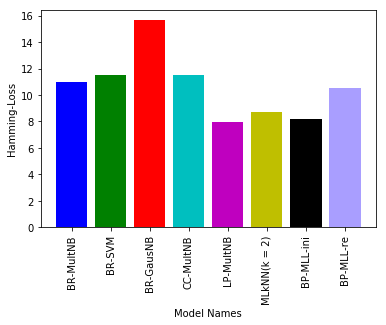

In [161]:
plt.xlabel('Model Names')
plt.ylabel('Hamming-Loss')
plt.xticks(rotation = 90)
for i in range(len(models)):
    plt.bar(models[i], hamming_loss[i], color = next(color))
plt.show()

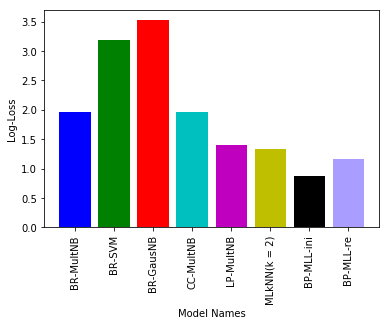

In [162]:
plt.xlabel('Model Names')
plt.ylabel('Log-Loss')
plt.xticks(rotation = 90)
for i in range(len(models)):
    plt.bar(models[i], logloss[i], color = next(color))
plt.show()

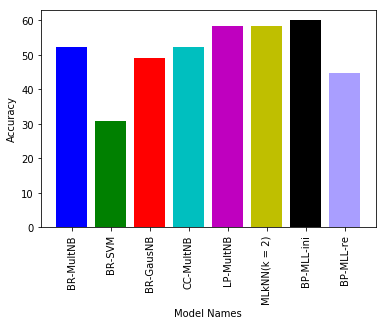

In [163]:
plt.xlabel('Model Names')
plt.ylabel('Accuracy')
plt.xticks(rotation = 90)
for i in range(len(models)):
    plt.bar(models[i], accuracy[i], color = next(color))
plt.show()